In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as train_test_split

In [2]:
df = pd.read_csv("loan_approval_data.csv")

## Data Analysis

In [12]:
df.sample(5)

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
702,703.0,8371.0,6228.0,Contract,38.0,Married,0.0,617.0,3.0,0.36,18296.0,3536.0,6079.0,84.0,Education,Rural,Graduate,Female,NaN,No
614,615.0,18521.0,1239.0,Contract,49.0,Single,3.0,673.0,NaN,0.12,7863.0,24665.0,36285.0,12.0,Personal,Semiurban,Not Graduate,Male,NaN,Yes
188,189.0,16486.0,4435.0,Salaried,56.0,Married,1.0,644.0,0.0,0.37,16226.0,255.0,31306.0,36.0,Car,Semiurban,Graduate,Male,Business,No
641,642.0,6777.0,1198.0,Salaried,23.0,Single,0.0,675.0,4.0,0.34,5261.0,26483.0,7840.0,60.0,Personal,Urban,Not Graduate,Female,Business,Yes
60,61.0,13534.0,1333.0,Contract,50.0,Married,1.0,NaN,1.0,0.42,18166.0,33481.0,NaN,NaN,Home,Urban,Graduate,Male,Unemployed,No


In [8]:
df.shape

(1000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [13]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [21]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

## Data Preprocessing

In [27]:
num_columns = df.select_dtypes(include=["float64"]).columns
obj_columns = df.select_dtypes(include=["object"]).columns

In [29]:
from sklearn.impute import SimpleImputer

num_mean = SimpleImputer(strategy='mean')
df[num_columns] = num_mean.fit_transform(df[num_columns])

obj_max = SimpleImputer(strategy='most_frequent')
df[obj_columns] = obj_max.fit_transform(df[obj_columns])

In [30]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

In [31]:
df["Loan_Approved"].value_counts()

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64

Text(0.5, 1.0, 'Is Loan Approved or not')

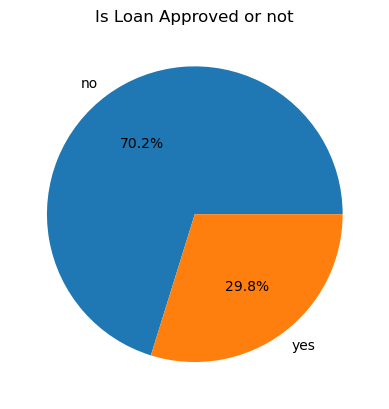

In [36]:
class_loan = df["Loan_Approved"].value_counts()

plt.pie(class_loan, labels=['no', 'yes'], autopct="%1.1f%%")
plt.title("Is Loan Approved or not")

[Text(0, 0, '621'), Text(0, 0, '379')]

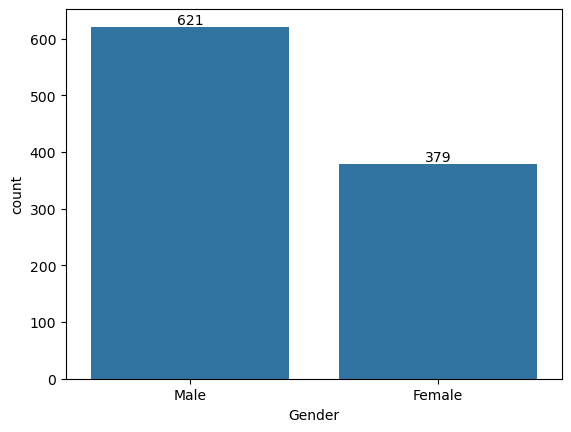

In [40]:
gender = df["Gender"].value_counts()

ax = sns.barplot(gender)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

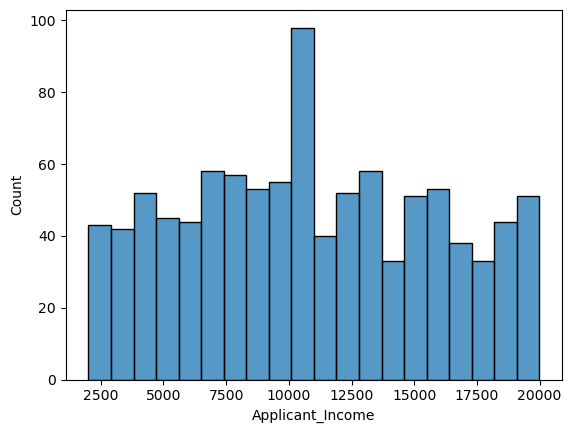

In [44]:
sns.histplot(data=df, x="Applicant_Income", bins = 20) 

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

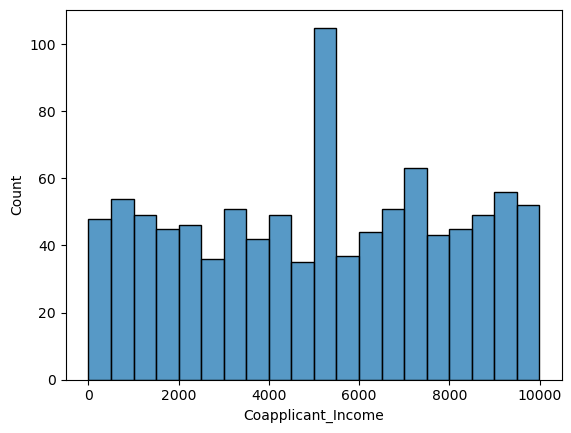

In [45]:
sns.histplot(data=df, x="Coapplicant_Income", bins = 20) 

/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

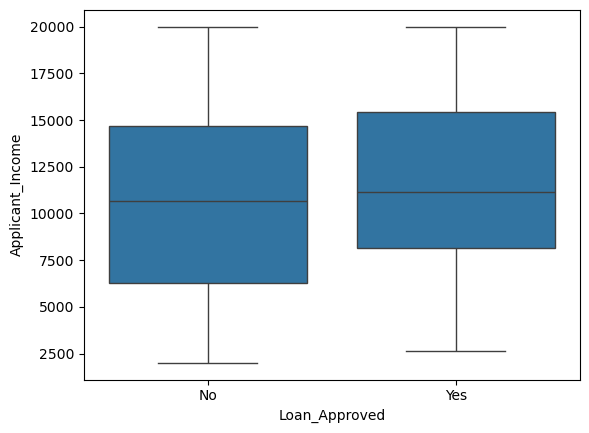

In [51]:
sns.boxplot(data=df, x="Loan_Approved", y="Applicant_Income")

/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


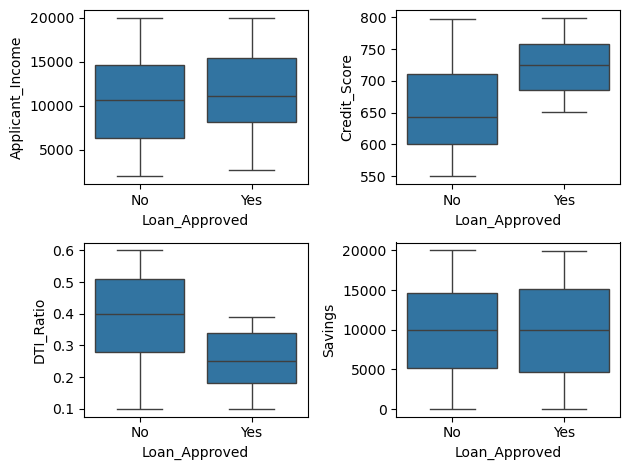

In [58]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax=axes[0,0], x=df["Loan_Approved"], y=df["Applicant_Income"])
sns.boxplot(ax=axes[0,1], x=df["Loan_Approved"], y=df["Credit_Score"])
sns.boxplot(ax=axes[1,0], x=df["Loan_Approved"], y=df["DTI_Ratio"])
sns.boxplot(ax=axes[1,1], x=df["Loan_Approved"], y=df["Savings"])

plt.tight_layout()